In [6]:
## Informal notebook used for various data inspection and plotting. Shouldn't be run from the command line.



# Imports
from datasets import load_dataset
from transformers import AutoTokenizer
import argparse
import numpy as np
import torch
import datasets
from datasets.dataset_dict import DatasetDict
from torch import nn
import random

from matplotlib import pyplot as plt

tifu_short_raw = load_dataset("reddit_tifu", "short", split="train")
tifu_long_raw = load_dataset("reddit_tifu", "long", split = "train")


def add_columns(example):
    example["upvote_ratio"] = round(example["upvote_ratio"], 1)
    example["labels"] = int(example["upvote_ratio"] * 10)
    return example

tifu_short = tifu_short_raw.map(add_columns)

def reconfigure_labels(example):
    if example["labels"] in [0,1,2,3,4,5,6]:
        example["labels"] = 0
    elif example["labels"] in [7,8]:
        example["labels"] = 1
    else:
        example["labels"] = 2
    return example

tifu_short_3 = tifu_short.map(reconfigure_labels)

Found cached dataset reddit_tifu (/home/coder/.cache/huggingface/datasets/reddit_tifu/short/1.1.0/1c73fb08807b54ec26b025829b2a3d90c6f7466dac20801c825571af9514c049)
Found cached dataset reddit_tifu (/home/coder/.cache/huggingface/datasets/reddit_tifu/long/1.1.0/1c73fb08807b54ec26b025829b2a3d90c6f7466dac20801c825571af9514c049)
Loading cached processed dataset at /home/coder/.cache/huggingface/datasets/reddit_tifu/short/1.1.0/1c73fb08807b54ec26b025829b2a3d90c6f7466dac20801c825571af9514c049/cache-8293ecb45eba0acb.arrow


  0%|          | 0/79740 [00:00<?, ?ex/s]

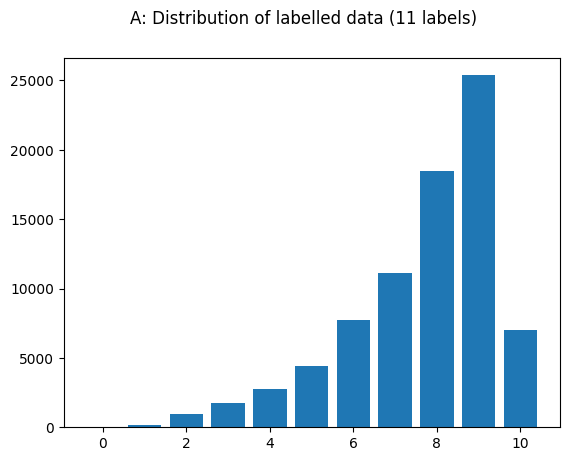

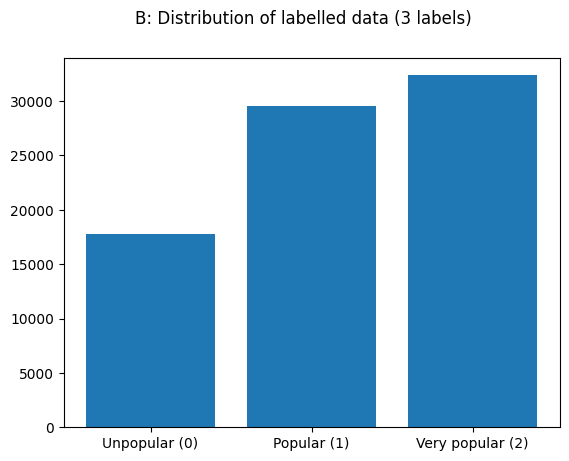

53


In [19]:
# Make plots
counts = []
for label in set(tifu_short["labels"]):
    count =tifu_short["labels"].count(label)
    counts.append(count)

plt.bar(x = [0,1,2,3,4,5,6,7,8,9,10], height = counts)
plt.suptitle("A: Distribution of labelled data (11 labels)")
plt.savefig("out/plot_11_labels")
plt.show()


counts = []
for label in set(tifu_short_3["labels"]):
    count =tifu_short_3["labels"].count(label)
    counts.append(count)

plt.bar(x = ["Unpopular (0)","Popular (1)","Very popular (2)"], height = counts)
plt.suptitle("B: Distribution of labelled data (3 labels)")
plt.savefig("out/plot_3_labels")
plt.show()

print(tifu_short["labels"].count(0))

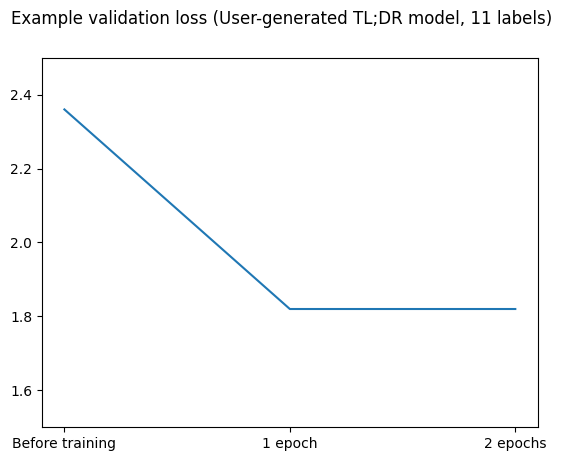

In [27]:
x = ["Before training", "1 epoch", "2 epochs"]
validation_loss = [2.36, 1.82, 1.82]
plt.plot(x, validation_loss)
plt.suptitle("Example validation loss (User-generated TL;DR model, 11 labels)")
plt.ylim([1.5, 2.5])
plt.savefig("out/Example_val_plot")

In [ ]:
for i in range(11):
    count = tifu_short["labels"].count(i)
    print(i, ": ", count)

96587.0
0.0


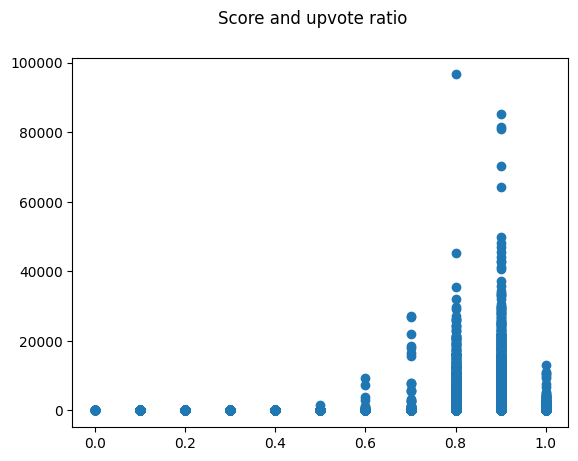

In [32]:
plt.scatter(tifu_short["upvote_ratio"], tifu_short["score"])
plt.suptitle("Score and upvote ratio")
plt.savefig("out/score_upvotes_plot.png")
print(np.max(np.array(tifu_short["score"])))
print(np.min(np.array(tifu_short["score"])))